***Sam Cressman***

__[Slide Deck](https://docs.google.com/presentation/d/18mvCR7z7jVEwM_QagcYoToSRF5gpYstVKftrcF-HiPw/edit#slide=id.p)__

***Predict the price of homes at sale for the Aimes Iowa Housing dataset***

***Step 1: EDA and Data Manipulation***

In [1891]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [1892]:
# Reading in CSVs
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test.csv")

In [1893]:
# EDA
train.head()
test.head();

In [1894]:
# EDA
train.shape
test.shape;

In [1895]:
# # EDA
# train.info()
# test.info();

In [1896]:
# EDA
train.dtypes
test.dtypes;

In [1897]:
# EDA:
train.select_dtypes(exclude=object).columns
len(train.select_dtypes(exclude=object).columns);

In [1898]:
# EDA: object columns
train.select_dtypes(include=object).columns
len(train.select_dtypes(include=object).columns);

In [1899]:
# EDA
train.describe().T
test.describe().T;

In [1900]:
# EDA
train["SalePrice"].mean();

In [1901]:
# EDA
train["Overall Qual"].mean();

In [1902]:
# EDA
train["Neighborhood"].value_counts();

In [1903]:
# EDA
train.isnull().sum()
test.isnull().sum();

In [1904]:
# EDA
total = train.isnull().sum()
total;

In [1905]:
# EDA
total_test = test.isnull().sum()
total_test;

In [1906]:
# MSSubClass: The building class
# 20 1-STORY 1946 & NEWER ALL STYLES
# 30 1-STORY 1945 & OLDER
# 40 1-STORY W/FINISHED ATTIC ALL AGES
# 45 1-1/2 STORY - UNFINISHED ALL AGES
# 50 1-1/2 STORY FINISHED ALL AGES
# 60 2-STORY 1946 & NEWER
# 70 2-STORY 1945 & OLDER
# 75 2-1/2 STORY ALL AGES
# 80 SPLIT OR MULTI-LEVEL
# 85 SPLIT FOYER
# 90 DUPLEX - ALL STYLES AND AGES
# 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
# 150 1-1/2 STORY PUD - ALL AGES
# 160 2-STORY PUD - 1946 & NEWER
# 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
# 190 2 FAMILY CONVERSION - ALL STYLES AND AGES

ms_sub_class_dict = {20: "1-STORY 1946 & NEWER ALL STYLES",
                30: "1-STORY 1945 & OLDER",
                40: "1-STORY W/FINISHED ATTIC ALL AGES",
                45: "1-1/2 STORY - UNFINISHED ALL AGES",
                50: "1-1/2 STORY FINISHED ALL AGES",
                60: "2-STORY 1946 & NEWER",
                70: "2-STORY 1945 & OLDER",
                75: "2-1/2 STORY ALL AGES",
                80: "SPLIT OR MULTI-LEVEL",
                85: "SPLIT FOYER",
                90: "DUPLEX - ALL STYLES AND AGES",
                120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                150: "1-1/2 STORY PUD - ALL AGES",
                160: "2-STORY PUD - 1946 & NEWER",
                180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"}

train["MS SubClass"] = train["MS SubClass"].map(ms_sub_class_dict)
test["MS SubClass"] = test["MS SubClass"].map(ms_sub_class_dict)

In [1907]:
# Dropping columns with over 1000 null values
train.drop(["Alley", "Fireplace Qu", "Pool QC", "Fence"], axis=1, inplace=True)
test.drop(["Alley", "Fireplace Qu", "Pool QC", "Fence"], axis=1, inplace=True)

In [1908]:
# Lot Frontage: Linear feet of street connected to property 
# Filling null with 0
train["Lot Frontage"].value_counts;
train["Lot Frontage"].fillna(0, inplace=True)

test["Lot Frontage"].fillna(0, inplace=True)
test["Lot Frontage"].isnull().sum();

In [1909]:
# EDA: MasVnrType: Masonry veneer type: adding null values as "None"
train["Mas Vnr Type"].value_counts()
train["Mas Vnr Type"].fillna("None", inplace=True)
train["Mas Vnr Type"].isnull().sum()

test["Mas Vnr Type"].value_counts()
test["Mas Vnr Type"].fillna("None", inplace=True)
test["Mas Vnr Type"].isnull().sum();

In [1910]:
# EDA: MasVnrArea: Masonry veneer area in square feet, assuming 22 null values should be 0 sq ft
train["Mas Vnr Area"].isnull().sum()
train["Mas Vnr Area"].fillna(0, inplace=True)
train["Mas Vnr Area"].isnull().sum()

test["Mas Vnr Area"].isnull().sum()
test["Mas Vnr Area"].fillna(0, inplace=True)
test["Mas Vnr Area"].isnull().sum();

In [1911]:
# EDA: BsmtQual: Height of the basement:
# Ex Excellent (100+ inches)
# Gd Good (90-99 inches)
# TA Typical (80-89 inches)
# Fa Fair (70-79 inches)
# Po Poor (<70 inches)
# NA No Basement

train["Bsmt Qual"].isnull().sum() # 55
test["Bsmt Qual"].isnull().sum() # 25

train["Bsmt Qual"].fillna("No Basement", inplace=True)
test["Bsmt Qual"].fillna("No Basement", inplace=True)

bsmt_qual_dict = {"Ex": 5, 
                  "Gd": 4, 
                  "TA": 3, 
                  "Fa": 2, 
                  "Po": 1, 
                  "No Basement": 0}

train["Bsmt Qual"] = train["Bsmt Qual"].map(bsmt_qual_dict)
test["Bsmt Qual"] = test["Bsmt Qual"].map(bsmt_qual_dict)

In [1912]:
# BsmtCond: General condition of the basement
# Ex Excellent
# Gd Good
# TA Typical - slight dampness allowed
# Fa Fair - dampness or some cracking or settling
# Po Poor - Severe cracking, settling, or wetness
# NA No Basement

train["Bsmt Cond"].isnull().sum() # 55 
train["Bsmt Cond"].fillna("No Basement", inplace=True)

test["Bsmt Cond"].isnull().sum() # 25
test["Bsmt Cond"].fillna("No Basement", inplace=True)

bsmt_cond_dict = {"Ex": 5, 
                  "Gd": 4, 
                  "TA": 3, 
                  "Fa": 2, 
                  "Po": 1, 
                  "No Basement": 0}

train["Bsmt Cond"] = train["Bsmt Cond"].map(bsmt_cond_dict)
test["Bsmt Cond"] = test["Bsmt Cond"].map(bsmt_cond_dict)

In [1913]:
# BsmtFinType1: Quality of basement finished area
# GLQ Good Living Quarters
# ALQ Average Living Quarters
# BLQ Below Average Living Quarters
# Rec Average Rec Room
# LwQ Low Quality
# Unf Unfinshed
# NA No Basement

train["BsmtFin Type 1"].isnull().sum() # 54
train["BsmtFin Type 1"].fillna("No Basement", inplace=True)

test["BsmtFin Type 1"].isnull().sum() # 25
test["BsmtFin Type 1"].fillna("No Basement", inplace=True)

bsmt_fin_type_1 = {"GLQ": 6,
                   "ALQ": 5,
                   "BLQ": 4,
                   "Rec": 3,
                   "LwQ": 2,
                   "Unf": 1,
                   "No Basement": 0}

train["BsmtFin Type 1"] = train["BsmtFin Type 1"].map(bsmt_fin_type_1)
test["BsmtFin Type 1"] = test["BsmtFin Type 1"].map(bsmt_fin_type_1)

In [1914]:
# Exter Qual: Exterior material quality
# Ex Excellent
# Gd Good
# TA Average/Typical
# Fa Fair
# Po Poor

exter_qual = {"Ex": 4,
             "Gd": 3,
             "TA": 2,
             "Fa": 1,
             "Po": 0}

train["Exter Qual"] = train["Exter Qual"].map(exter_qual)
test["Exter Qual"] = test["Exter Qual"].map(exter_qual)

In [1915]:
# Exter Cond: Present condition of the material on the exterior
# Ex Excellent
# Gd Good
# TA Average/Typical
# Fa Fair
# Po Poor

exter_cond = {"Ex": 4,
             "Gd": 3,
             "TA": 2,
             "Fa": 1,
             "Po": 0}

train["Exter Cond"] = train["Exter Cond"].map(exter_cond)
test["Exter Cond"] = test["Exter Cond"].map(exter_cond)

In [1916]:
# BsmtFinType2: Quality of second finished area (if present)
# GLQ Good Living Quarters
# ALQ Average Living Quarters
# BLQ Below Average Living Quarters
# Rec Average Rec Room
# LwQ Low Quality
# Unf Unfinshed
# NA No Basement

train["BsmtFin Type 2"].isnull().sum() # 55
train["BsmtFin Type 2"].fillna("No Basement", inplace=True)

test["BsmtFin Type 2"].isnull().sum() # 25
test["BsmtFin Type 2"].fillna("No Basement", inplace=True)

bsmt_fin_type_2 = {"GLQ": 6,
                   "ALQ": 5,
                   "BLQ": 4,
                   "Rec": 3,
                   "LwQ": 2,
                   "Unf": 1,
                   "No Basement": 0}

train["BsmtFin Type 2"] = train["BsmtFin Type 2"].map(bsmt_fin_type_2)
test["BsmtFin Type 2"] = test["BsmtFin Type 2"].map(bsmt_fin_type_2)

In [1917]:
# BsmtExposure: Walkout or garden level basement walls
# Gd Good Exposure
# Av Average Exposure (split levels or foyers typically score average or above)
# Mn Mimimum Exposure
# No No Exposure
# NA No Basement

train["Bsmt Exposure"].isnull().sum() # 58
train["Bsmt Exposure"].fillna("No Basement", inplace=True)

test["Bsmt Exposure"].isnull().sum() # 25
test["Bsmt Exposure"].fillna("No Basement", inplace=True)

bsmt_exposure = {"Gd": 4,
                 "Av": 3,
                 "Mn": 2,
                 "No": 1,
                 "No Basement": 0}

train["Bsmt Exposure"] = train["Bsmt Exposure"].map(bsmt_exposure)
test["Bsmt Exposure"] = test["Bsmt Exposure"].map(bsmt_exposure)

In [1918]:
# BsmtFullBath: Basement full bathrooms: making 2 null values 0

train["Bsmt Full Bath"].isnull().sum() # 2
train["Bsmt Full Bath"].fillna(0, inplace=True)

# test["Bsmt Full Bath"].isnull().sum() # 0

In [1919]:
# BsmtHalfBath: Basement half bathrooms: making 2 training null values 0
train["Bsmt Half Bath"].value_counts()
train["Bsmt Half Bath"].isnull().sum()
train["Bsmt Half Bath"].fillna(0, inplace=True)

# test["Bsmt Half Bath"].isnull().sum() # 0

In [1920]:
# MiscFeature: Miscellaneous features not covered in other categories (keeping for this reason): 
# setting nulls to "None"

# Elev Elevator
# Gar2 2nd Garage (if not described in garage section)
# Othr Other
# Shed Shed (over 100 SF)
# TenC Tennis Court
# NA None

train["Misc Feature"].isnull().sum() # 1986

train["Misc Feature"].value_counts()
train["Misc Feature"].fillna("None", inplace=True)

test["Misc Feature"].value_counts()
test["Misc Feature"].fillna("None", inplace=True)

In [1921]:
# GarageQual: Garage quality: replacing null with "No Garage"
# Ex Excellent
# Gd Good
# TA Typical/Average
# Fa Fair
# Po Poor
# NA No Garage

train["Garage Qual"].isnull().sum() # 114
train["Garage Qual"].fillna("No Garage", inplace=True)

test["Garage Qual"].isnull().sum() # 45
test["Garage Qual"].fillna("No Garage", inplace=True)

garage_qual = {"Ex": 5,
             "Gd": 4,
             "TA": 3,
             "Fa": 2,
             "Po": 1,
             "No Garage": 0}

train["Garage Qual"] = train["Garage Qual"].map(garage_qual)
test["Garage Qual"] = test["Garage Qual"].map(garage_qual)

In [1922]:
# GarageCond: Garage condition: replacing null with "No Garage"
# Ex Excellent
# Gd Good
# TA Typical/Average
# Fa Fair
# Po Poor
# NA No Garage

train["Garage Cond"].isnull().sum() # 114
train["Garage Cond"].fillna("No Garage", inplace=True)

test["Garage Cond"].isnull().sum() # 45
test["Garage Cond"].fillna("No Garage", inplace=True)

garage_cond = {"Ex": 5,
             "Gd": 4,
             "TA": 3,
             "Fa": 2,
             "Po": 1,
             "No Garage": 0}

train["Garage Cond"] = train["Garage Cond"].map(garage_cond)
test["Garage Cond"] = test["Garage Cond"].map(garage_cond)

In [1923]:
# GarageCars: Size of garage in car capacity

train["Garage Cars"].isnull().sum() # 1
train["Garage Cars"].fillna(0, inplace=True)

# test["Garage Cars"].isnull().sum() # 0

# train["Garage Cars"].nunique() # 6 (0, 1, 2, 3, 4, 5)
# test["Garage Cars"].nunique() # 5 (0, 1, 2, 3, 4)

In [1924]:
# GarageArea: Size of garage in square feet
train["Garage Area"].isnull().sum() # 1 
train["Garage Area"].fillna(0, inplace=True)

# test["Garage Area"].isnull().sum() # 0

In [1925]:
# GarageFinish: Interior finish of the garage: filling null with "No Garage"
# Fin Finished
# RFn Rough Finished
# Unf Unfinished
# NA No Garage

train["Garage Finish"].isnull().sum() # 114
train["Garage Finish"].fillna("No Garage", inplace=True)

test["Garage Finish"].isnull().sum() # 45
test["Garage Finish"].fillna("No Garage", inplace=True)

garage_finish_dict = {"Fin": 3,
                     "RFn": 2,
                     "Unf": 1,
                     "No Garage": 0}

train["Garage Finish"] = train["Garage Finish"].map(garage_finish_dict)
test["Garage Finish"] = test["Garage Finish"].map(garage_finish_dict)

In [1926]:
# GarageYrBlt: Year garage was built: 114 null values, dropping column since I do not find it appropriate to
# replace null with 0 or even the mean of the column (and I would like to keep those rows)

train["Garage Yr Blt"].isnull().sum() # 114

# train["Garage Yr Blt"].mean()

train.drop(["Garage Yr Blt"], axis=1, inplace=True)
test.drop(["Garage Yr Blt"], axis=1, inplace=True)

In [1927]:
# GarageType: Garage location
# 2Types More than one type of garage
# Attchd Attached to home
# Basment Basement Garage
# BuiltIn Built-In (Garage part of house - typically has room above garage)
# CarPort Car Port
# Detchd Detached from home
# NA No Garage

train["Garage Type"].isnull().sum() # 113
train["Garage Type"].fillna("No Garage", inplace=True)

test["Garage Type"].isnull().sum() # 44
test["Garage Type"].fillna("No Garage", inplace=True)

In [1928]:
train["MS Zoning"].value_counts();

In [1929]:
# BsmtFinSF1: Type 1 finished square feet: 1 null
# BsmtFinSF2: Type 2 finished square feet: 1 null
# BsmtUnfSF: Unfinished square feet of basement area: 1 null
# TotalBsmtSF: Total square feet of basement area: 1 null

train["BsmtFin SF 1"].fillna(0, inplace=True)
train["BsmtFin SF 2"].fillna(0, inplace=True)
train["Bsmt Unf SF"].fillna(0, inplace=True)
train["Total Bsmt SF"].fillna(0, inplace=True)

In [1930]:
# LotShape: General shape of property: mapped "Lot Shape" as ordinal values
# Reg Regular
# IR1 Slightly irregular
# IR2 Moderately Irregular
# IR3 Irregular

lot_shape_dict = {"Reg": 3, 
                  "IR1": 2, 
                  "IR2": 1, 
                  "IR3": 0}

train["Lot Shape"] = train["Lot Shape"].map(lot_shape_dict)
test["Lot Shape"] = test["Lot Shape"].map(lot_shape_dict)

In [1931]:
# LandContour: Flatness of the property

# Lvl Near Flat/Level
# Bnk Banked - Quick and significant rise from street grade to building
# HLS Hillside - Significant slope from side to side
# Low Depression

land_contour_dict = {"Lvl": 3,
                     "Bnk": 2, 
                     "HLS": 1, 
                     "Low": 0}

train["Land Contour"] = train["Land Contour"].map(land_contour_dict)
test["Land Contour"] = test["Land Contour"].map(land_contour_dict)

In [1932]:
# LandSlope: Slope of property
# Gtl Gentle slope
# Mod Moderate Slope
# Sev Severe Slope

land_slope_dict = {"Gtl": 2,
                   "Mod": 1,
                   "Sev": 0}

train["Land Slope"] = train["Land Slope"].map(land_slope_dict)
test["Land Slope"] = test["Land Slope"].map(land_slope_dict)

In [1933]:
# HeatingQC: Heating quality and condition

train["Heating QC"].unique()

heating_qc = {"Ex": 4,
             "Gd": 3,
             "TA": 2,
             "Fa": 1,
             "Po": 0
             }

train["Heating QC"] = train["Heating QC"].map(heating_qc)
test["Heating QC"] = test["Heating QC"].map(heating_qc)

In [1934]:
train["Central Air"].unique()

central_air_dict = {"Y": 1,
                   "N": 0}

train["Central Air"] = train["Central Air"].map(central_air_dict)
test["Central Air"] = test["Central Air"].map(central_air_dict)

In [1935]:
# Kitchen Qual: Kitchen quality
# Ex Excellent
# Gd Good
# TA Typical/Average
# Fa Fair
# Po Poor

kitchen_qual_dict = {"Ex": 4,
             "Gd": 3,
             "TA": 2,
             "Fa": 1,
             "Po": 0}

train["Kitchen Qual"] = train["Kitchen Qual"].map(kitchen_qual_dict)
test["Kitchen Qual"] = test["Kitchen Qual"].map(kitchen_qual_dict)

In [1936]:
# MoSold: Month Sold

mo_sold_dict = {1: "January",
               2: "February",
               3: "March",
               4: "April",
               5: "May",
               6: "June",
               7: "July",
               8: "August",
               9: "September",
               10: "October",
               11: "November",
               12: "December"}

train["Mo Sold"] = train["Mo Sold"].map(mo_sold_dict)
test["Mo Sold"] = test["Mo Sold"].map(mo_sold_dict)

In [1937]:
train.corr()["SalePrice"].sort_values(ascending=False);

***Step 2: Feature Engineering***

In [1938]:
# Column creation feature engineering: total inside square feet

train["totalinsidesquarefeet"] = (train["Mas Vnr Area"] + train["Total Bsmt SF"] - train["Bsmt Unf SF"] + 
                                  train["1st Flr SF"] + train["2nd Flr SF"] - train["Low Qual Fin SF"])

test["totalinsidesquarefeet"] = (test["Mas Vnr Area"] + test["Total Bsmt SF"] - test["Bsmt Unf SF"] + 
                                 test["1st Flr SF"] + test["2nd Flr SF"] - test["Low Qual Fin SF"])

In [1939]:
# Column creation feature engineering: total outside square feet

train["totaloutsidesquarefeet"] = (train["Lot Area"] + train["Wood Deck SF"] + train["Open Porch SF"] + 
                                   train["Enclosed Porch"] + train["3Ssn Porch"] + train["Screen Porch"])

test["totaloutsidesquarefeet"] = (test["Lot Area"] + test["Wood Deck SF"] + test["Open Porch SF"] + 
                                  test["Enclosed Porch"] + test["3Ssn Porch"] + test["Screen Porch"])

In [1940]:
# Column creation feature engineering: total square feet

train["totalsquarefeet"] = train["totalinsidesquarefeet"] + train["totaloutsidesquarefeet"]

test["totalsquarefeet"] = test["totalinsidesquarefeet"] + test["totaloutsidesquarefeet"]

In [1941]:
# Column creation feature engineering: sold house age

train["soldhouseage"] = train["Yr Sold"] - train["Year Built"]

test["soldhouseage"] = test["Yr Sold"] - test["Year Built"]

In [1942]:
# Column creation feature engineering: years since remodel

train["yearssinceremodel"] = train["Year Remod/Add"] - train["Year Built"]
test["yearssinceremodel"] = test["Year Remod/Add"] - test["Year Built"]

In [1943]:
# Column creation feature engineering: overall quality and condition

train["overallqualcond"] = train["Overall Qual"] + train["Overall Cond"]

test["overallqualcond"] = test["Overall Qual"] + test["Overall Cond"]

In [1944]:
# Column creation feature engineering: overall quality and condition

train["exterqualcond"] = train["Exter Qual"] + train["Exter Cond"]

test["exterqualcond"] = test["Exter Qual"] + test["Exter Cond"]

In [1945]:
# Column creation feature engineering: overall basement quality

train["overallbsmt"] = train["Bsmt Qual"] + train["Bsmt Cond"] + train["Bsmt Exposure"] + train["BsmtFin Type 1"]

test["overallbsmt"] = test["Bsmt Qual"] + test["Bsmt Cond"] + test["Bsmt Exposure"] + test["BsmtFin Type 1"]

In [1946]:
# Column creation feature engineering: total bathrooms

train["totalbath"] = train["Bsmt Full Bath"] + train["Bsmt Half Bath"] + train["Full Bath"] + train["Half Bath"]

test["totalbath"] = test["Bsmt Full Bath"] + test["Bsmt Half Bath"] + test["Full Bath"] + test["Half Bath"]

In [1947]:
# Column creation feature engineering: total rooms (rooms and bathrooms)

train["totalroomsandbaths"] = train["TotRms AbvGrd"] + train["totalbath"]

test["totalroomsandbaths"] = test["TotRms AbvGrd"] + test["totalbath"]

In [1948]:
# Column creation feature engineering: garage quality

train["garagequal"] = train["Garage Finish"] + train["Garage Qual"] + train["Garage Cond"]

test["garagequal"] = test["Garage Finish"] + test["Garage Qual"] + test["Garage Cond"]

In [1949]:
# Column creation feature engineering: quality indicators

train["qualityindicators"] = (train["Overall Qual"] + train["Overall Cond"] + train["Exter Qual"] + 
train["Exter Cond"] + train["Bsmt Qual"] + train["Bsmt Cond"] + train["Bsmt Exposure"] + train["BsmtFin Type 1"] +
train["Heating QC"] + train["Kitchen Qual"] + train["Garage Finish"] + train["Garage Qual"] + train["Garage Cond"])

test["qualityindicators"] = (test["Overall Qual"] + test["Overall Cond"] + test["Exter Qual"] + 
test["Exter Cond"] + test["Bsmt Qual"] + test["Bsmt Cond"] + test["Bsmt Exposure"] + test["BsmtFin Type 1"] +
test["Heating QC"] + test["Kitchen Qual"] + test["Garage Finish"] + test["Garage Qual"] + test["Garage Cond"])

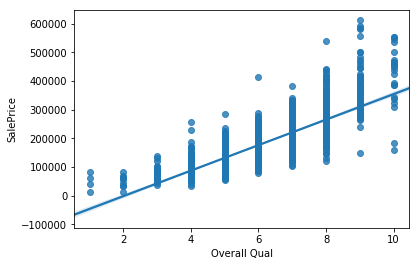

In [1950]:
# Plotting EDA
sns.regplot("Overall Qual", "SalePrice", data=train)

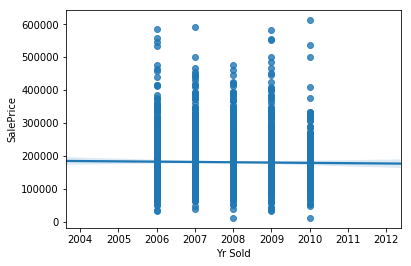

In [1951]:
# Plotting EDA
sns.regplot("Yr Sold", "SalePrice", data=train)

***Step 3: Dummy Variables***

In [1952]:
train.select_dtypes(exclude=object).columns;

In [1953]:
train.select_dtypes(include=object).columns;

In [1954]:
test.select_dtypes(exclude=object).columns;

In [1955]:
test.select_dtypes(include=object).columns;

In [1956]:
train.shape;

In [1957]:
test.shape;

In [1958]:
train_categorical_dummies = pd.get_dummies(train[['MS SubClass', 'MS Zoning', 'Street', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'Garage Type', 'Paved Drive', 'Misc Feature', 'Mo Sold', 'Sale Type']], drop_first=True)

In [1959]:
test_categorical_dummies = pd.get_dummies(test[['MS SubClass', 'MS Zoning', 'Street', 'Utilities', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'Garage Type', 'Paved Drive', 'Misc Feature', 'Mo Sold','Sale Type']], drop_first=True)

In [1960]:
train_with_dummies = pd.concat([train, train_categorical_dummies], axis=1)

In [1961]:
test_with_dummies = pd.concat([test, test_categorical_dummies], axis=1)

In [1962]:
train_with_dummies.shape;

In [1963]:
test_with_dummies.shape;

In [1964]:
train_with_dummies_columns = list(train_with_dummies.columns)
test_with_dummies_columns = list(test_with_dummies.columns)

In [1965]:
train_with_dummies_columns;

In [1966]:
test_with_dummies_columns;

In [1967]:
missing_cols = set(train_with_dummies_columns) - set(test_with_dummies_columns)
# len(list(missing_cols))

In [1968]:
for col in missing_cols:
    test_with_dummies[col] = [0 for x in range(1, 880)]

In [1969]:
categorical = [col for col in train_with_dummies.columns if '_' in col]

In [1970]:
numeric = (train_with_dummies.select_dtypes(exclude=object).columns)
numeric = numeric.drop('SalePrice')
numeric = list(numeric)

In [1971]:
all_features = categorical + numeric
all_features;

***Step 4: Lasso Regularization Model***

In [1972]:
X = train_with_dummies[all_features]
y = train_with_dummies["SalePrice"]
X_test = test_with_dummies[all_features]

ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_test_scaled = ss.transform(X_test)

lasso_model = LassoCV(n_alphas=100, cv=5)

lasso_model = lasso_model.fit(X_scaled, y)
lasso_model.predict(X_test_scaled)

lasso_coefs = lasso_model.coef_

In [1973]:
lasso_abs_coefs = list(zip(list(abs(lasso_coefs)), all_features))

lasso_abs_coefs_sorted = sorted(lasso_abs_coefs, reverse=True)
lasso_abs_coefs_sorted;

In [1974]:
lasso_coefs = list((abs(lasso_model.coef_)))

lasso_coefs.count(0)
len(lasso_coefs)

lasso_zero_percentage = lasso_coefs.count(0) / len(lasso_coefs)
lasso_zero_percentage;

In [1975]:
test_predictions = lasso_model.predict(X_test_scaled)

In [1976]:
test["SalePrice"] = test_predictions
test[["Id", "SalePrice"]].to_csv("final_submission.csv", index=False)

In [1977]:
# Further EDA after Lasso
train_with_dummies.corr()["SalePrice"].sort_values(ascending=False);

***Step 5: Post Lasso Further EDA Plotting***

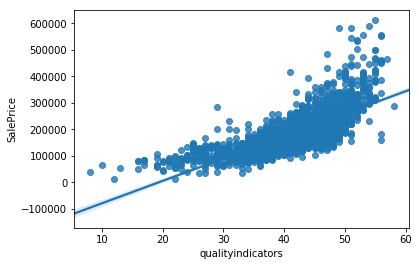

In [1978]:
sns.regplot("qualityindicators", "SalePrice", data=train_with_dummies)

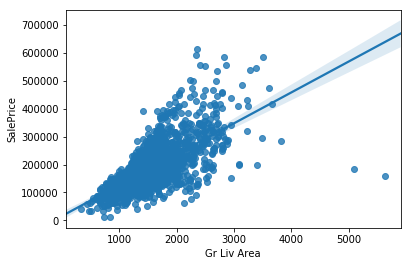

In [1979]:
sns.regplot("Gr Liv Area", "SalePrice", data=train_with_dummies)

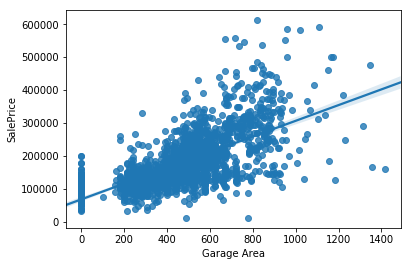

In [1980]:
sns.regplot("Garage Area", "SalePrice", data=train_with_dummies)

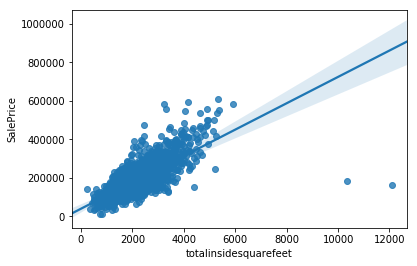

In [1981]:
sns.regplot("totalinsidesquarefeet", "SalePrice", data=train_with_dummies)

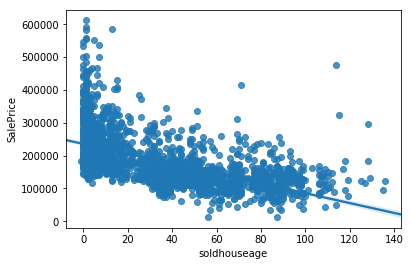

In [1982]:
sns.regplot("soldhouseage", "SalePrice", data=train_with_dummies)

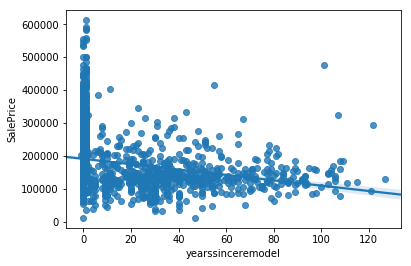

In [1983]:
sns.regplot("yearssinceremodel", "SalePrice", data=train_with_dummies)

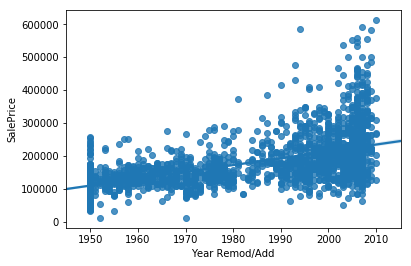

In [1984]:
sns.regplot("Year Remod/Add", "SalePrice", data=train_with_dummies)

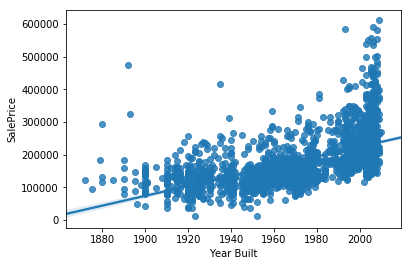

In [1985]:
sns.regplot("Year Built", "SalePrice", data=train_with_dummies)

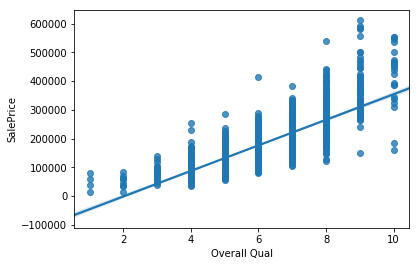

In [1986]:
sns.regplot("Overall Qual", "SalePrice", data=train_with_dummies)

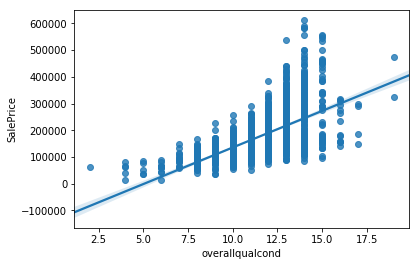

In [1987]:
sns.regplot("overallqualcond", "SalePrice", data=train_with_dummies)

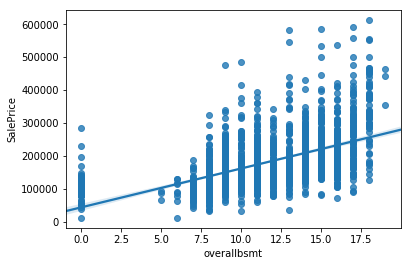

In [1988]:
sns.regplot("overallbsmt", "SalePrice", data=train_with_dummies)

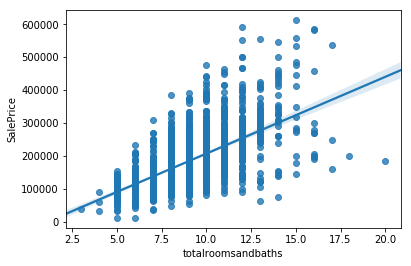

In [1989]:
sns.regplot("totalroomsandbaths", "SalePrice", data=train_with_dummies)

***Step 6: Running "Cherry Picked" Features through Lasso***

In [1990]:
features = ["Gr Liv Area", "overallqualcond", "soldhouseage", "qualityindicators", "totalinsidesquarefeet", 
            "Neighborhood_NoRidge", "Neighborhood_Crawfor", "Neighborhood_StoneBr", "Garage Cars", "totalsquarefeet",
           "Total Bsmt SF", "Kitchen Qual", "Exter Qual", "Sale Type_New", "MS Zoning_C (all)", "MS Zoning_I (all)"]

X = train_with_dummies[features]
y = np.log1p(train_with_dummies["SalePrice"])
X_test = test_with_dummies[features]

ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_test_scaled = ss.transform(X_test)

lasso_model = LassoCV(n_alphas=100, cv=5)
lasso_model = lasso_model.fit(X_scaled, y)

saleprice_transformed_predicted = lasso_model.predict(X_test_scaled)
saleprice_predicted = np.expm1(saleprice_transformed_predicted)

lasso_coefs = lasso_model.coef_

lasso_coefs;

In [1991]:
lasso_abs_coefs = list(zip(list(abs(lasso_coefs)), features))

lasso_abs_coefs_sorted = sorted(lasso_abs_coefs, reverse=True)
lasso_abs_coefs_sorted;

In [1992]:
test["SalePrice"] = saleprice_predicted
test[["Id", "SalePrice"]].to_csv("final_submission.csv", index=False);